# Set of Experiments
Goals: minimizing latency and maximizing benchmark performance, while using lightweight components where possible. 

 

## ⚙️ General Implementation Setup 

Environment: Python 3.10+, TensorFlow/Keras or PyTorch, scikit-learn, HuggingFace Transformers, DeepFace, OpenSMILE, librosa. 

Evaluation Split: Stratified Shuffle Split (70% train, 30% test). 

Metrics Across All Tasks: 
- Accuracy 
- F1-Score (macro): Handles emotion class imbalance. 
- Latency (ms/sample or s/batch) 
- Model Size (MB) 
- Confusion Matrix for qualitative insights. 


 Datasets: RAVDESS, EmoDB, TESS (CREMA-D optional; map to shared label space) 

Labels: Anger, Disgust, Fear, Happiness, Sadness, Surprise, Neutral





Path to dataset files: /Users/sofiafernandes/.cache/kagglehub/datasets/piyushagni5/berlin-database-of-emotional-speech-emodb/versions/1
Path to dataset files: /Users/sofiafernandes/.cache/kagglehub/datasets/uwrfkaggler/ravdess-emotional-speech-audio/versions/1
['Actor_16', 'Actor_11', 'Actor_18', 'Actor_20', 'Actor_21', 'Actor_19', 'Actor_10', 'Actor_17', 'Actor_04', 'Actor_03', 'Actor_02', 'Actor_05', 'audio_speech_actors_01-24', 'Actor_12', 'Actor_15', 'Actor_23', 'Actor_24', 'Actor_22', 'Actor_14', 'Actor_13', 'Actor_09', 'Actor_07', 'Actor_06', 'Actor_01', 'Actor_08']
Path to dataset files: /Users/sofiafernandes/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1
['TESS']
['YAF_disgust', 'OAF_Pleasant_surprise', 'OAF_happy', 'YAF_sad', 'YAF_happy', 'YAF_neutral', 'OAF_Fear', 'OAF_angry', 'YAF_pleasant_surprised', 'YAF_fear', 'OAF_neutral', 'OAF_disgust', 'YAF_angry', 'OAF_Sad']
Path to dataset files: /Users/sofiafernandes/.cache/kagglehub/datasets/ejlok1/c

<Axes: title={'center': 'Emotion Distribution'}, xlabel='label'>

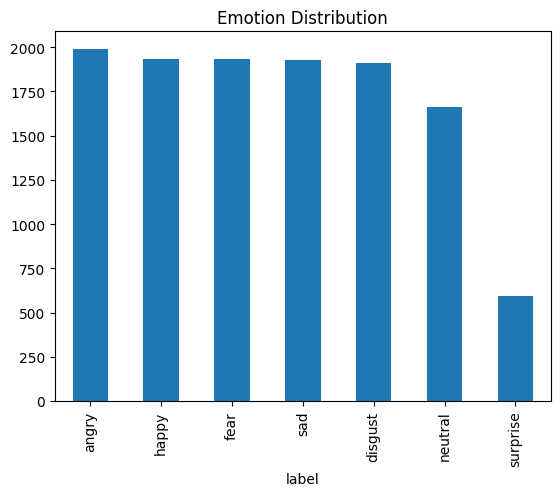

In [9]:
import sys
import os
# insert the path to the source code directory
module_path = os.path.abspath(os.path.join('..', '..')) 
sys.path.insert(0, module_path)

from src.utils import load_emodb, load_ravdess, load_tess, load_crema_d, filter_emotions

import numpy as np
import pandas as pd

emodb = filter_emotions(load_emodb())
ravdess = filter_emotions(load_ravdess())
tess = filter_emotions(load_tess())
crema = filter_emotions(load_crema_d())

# add a dataset column to each dataset
emodb['dataset'] = 'emodb'
ravdess['dataset'] = 'ravdess'
tess['dataset'] = 'tess'
crema['dataset'] = 'crema'

# concatenate all datasets
df = pd.concat([emodb, ravdess, tess, crema], ignore_index=True)
# shuffle the dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)


# save the dataset to a csv file
output_file = 'combined_emotion_dataset.csv'
df.to_csv(output_file, index=False)

# plot the distribution of emotions
df['label'].value_counts().plot(kind='bar', title='Emotion Distribution')

In [2]:
load_emodb()['label'].value_counts()

Path to dataset files: /Users/sofiafernandes/.cache/kagglehub/datasets/piyushagni5/berlin-database-of-emotional-speech-emodb/versions/1


label
angry      127
boredom     81
neutral     79
happy       71
fear        69
sad         62
disgust     46
Name: count, dtype: int64

In [3]:
# OpenSMILE feature extraction
# https://audeering.github.io/opensmile-python/
#!pip install opensmile

import opensmile

def extract_features_opensmile():
    """ Extract features from the individual datasets using OpenSMILE.
    This function processes the EMO-DB, RAVDESS, TESS, and CREMA-D datasets
    and saves the extracted features to CSV files.
    """
    # Load data and extract features
    smile = opensmile.Smile(
        feature_set=opensmile.FeatureSet.GeMAPSv01b,
        #feature_set=opensmile.FeatureSet.eGeMAPSv02,
        feature_level=opensmile.FeatureLevel.Functionals,
    )

    #feats_emodb = smile.process_files(emodb["filename"])
    #feats_emodb.to_csv('emodb_features.csv', index=False)

    #feats_ravdess = smile.process_files(ravdess["filename"])
    #feats_ravdess.to_csv('ravdess_features.csv', index=False)

    #feats_tess = smile.process_files(tess["filename"])
    #feats_tess.to_csv('tess_features.csv', index=False)

    feats_crema = smile.process_files(crema["filename"])
    feats_crema.to_csv('crema_features.csv', index=False)

extract_features_opensmile()
#feats_df = pd.read_csv('combined_df_features_crema.csv')
feats_emodb = pd.read_csv('emodb_features.csv')
feats_emodb['dataset'] = 'emodb'
feats_ravdess = pd.read_csv('ravdess_features.csv')
feats_ravdess['dataset'] = 'ravdess'
feats_tess = pd.read_csv('tess_features.csv')
feats_tess['dataset'] = 'tess'
feats_crema = pd.read_csv('crema_features.csv')
feats_crema['dataset'] = 'crema'
# combine all features into a single dataframe
feats_df = pd.concat([feats_emodb, feats_ravdess, feats_tess, feats_crema], ignore_index=True)

In [4]:


# Load data and extract features
smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.GeMAPSv01b,
    #feature_set=opensmile.FeatureSet.eGeMAPSv02,
    feature_level=opensmile.FeatureLevel.Functionals,
)

#feats_df = smile.process_files(df["filename"])
#feats_df = pd.read_csv('combined_df_features.csv')
# save the features to a csv file
feats_df.to_csv('combined_df_features_cremad.csv', index=False)

feats_df.head()

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,hammarbergIndexUV_sma3nz_amean,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,dataset
0,41.152687,0.119568,38.206410,41.596970,43.566230,5.359821,38.043438,41.589670,57.602270,35.204792,...,12.494416,0.008704,0.011329,4.390244,3.500000,0.208571,0.141566,0.072000,0.036551,emodb
1,29.344051,0.033157,28.594852,29.091187,30.407171,1.812319,121.797240,167.920100,22.221197,13.601577,...,11.243003,-0.011442,0.016779,4.402516,4.545454,0.090000,0.068243,0.107143,0.055988,emodb
2,36.554493,0.064922,34.792404,36.899850,38.542120,3.749718,101.899666,151.185750,48.196270,20.018640,...,19.157671,-0.021964,-0.002345,5.502393,3.389830,0.105714,0.087155,0.157333,0.168779,emodb
3,40.611958,0.147944,36.786343,41.586903,44.147540,7.361198,244.031330,170.801330,118.145420,96.427310,...,14.624594,-0.001218,0.014095,5.012531,4.060914,0.151875,0.142004,0.077333,0.033757,emodb
4,30.709673,0.162943,29.146856,30.345924,30.905537,1.758680,137.508770,104.121574,118.884730,107.118600,...,29.217485,-0.042484,0.005004,5.288462,2.955665,0.186667,0.095510,0.111429,0.091562,emodb


## 🔊 4.4.1 Speech Emotion Recognition (SER) 

### Experiment 1.1 – SVM Parameter Tuning 

Features: 
- OpenSMILE GeMAPS 
- librosa: MFCCs, chroma, pitch 

Grid Search Params: 

C: [0.1, 1, 10], kernel: [‘linear’, ‘rbf’], gamma: [0.01, 0.1, 1] 

Metrics: Accuracy, F1-macro, Latency (time to predict full test set) 


In [10]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from joblib import dump, load

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectKBest(f_classif, k=40)),  # Or whatever method you use
    ('svm', SVC(kernel='rbf', C=10.0, gamma='scale', probability=True))
])

# Fit the model
#X = feats_df
#y = df['label']
# Load features from disk
data = np.load('./features/iemocap_GeMAPS_features.npz')

X_iemocap = data['X']
y_iemocap = data['y']
# filter bothe to only include allowed emotions
#allowed_emotions = ['happy', 'sad', 'angry', 'neutral', 'fear', 'surprise', 'disgust']
#mask = np.isin(y, allowed_emotions)
#X = X[mask]
#y = y[mask]
X = feats_df.drop(columns=['dataset'])
y = df['label']
#pd.concat([pd.DataFrame(X_iemocap), feats_df], axis=1)
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection', SelectKBest(k=40)),
                ('svm', SVC(C=10.0, probability=True))])

In [ ]:
# perform grid search for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'svm__C': [0.1, 1.0, 10.0],
    'svm__gamma': ['scale'], #'auto'],
    'svm__kernel': ['rbf'], #['linear', 'rbf'],
    'feature_selection__k': [30, 40, 50] #[10, 20, 30]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Save the best model
best_model = grid_search.best_estimator_
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)
dump(best_model, 'ser_svm_model.joblib')

Best parameters found:  {'feature_selection__k': 40, 'svm__C': 10.0, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Best cross-validation score:  0.858142455294354


['ser_svm_model.joblib']

Best parameters found:  {'feature_selection__k': 30, 'svm__C': 10.0, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Best cross-validation score:  0.8454446205317838

/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/sklearn/metrics/_classification.py:

              precision    recall  f1-score   support

       angry       0.11      0.19      0.14      1269
     disgust       0.00      0.50      0.00         2
     excited       0.00      0.00      0.00      1976
        fear       0.01      0.19      0.02       107
  frustrated       0.00      0.00      0.00      2917
       happy       0.07      0.23      0.11       656
     neutral       0.23      0.13      0.17      1726
       other       0.00      0.00      0.00        26
         sad       0.13      0.12      0.13      1250
    surprise       0.06      0.07      0.06       110

    accuracy                           0.08     10039
   macro avg       0.06      0.14      0.06     10039
weighted avg       0.08      0.08      0.07     10039

Accuracy: 0.07998804661818906


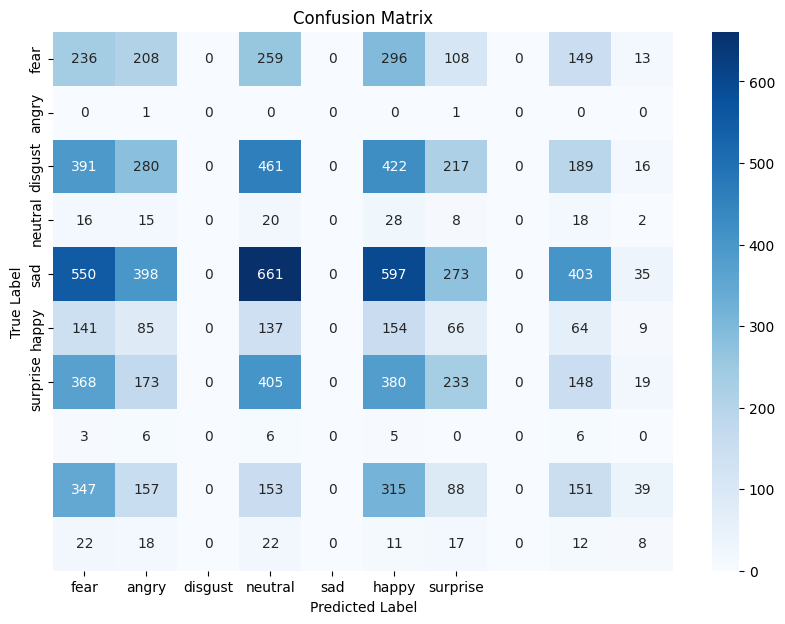

In [12]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from seaborn import heatmap
import matplotlib.pyplot as plt

def evaluate_model(best_model, X_test, y_test):
    """ Evaluate the model on the test set and print the classification report, accuracy, and confusion matrix. """
    # Make predictions
    #y_pred = pipeline.predict(X_test)
    # or using the best model from grid search
    y_pred = best_model.predict(X_test)   
    # Print classification report
    print(classification_report(y_test, y_pred))
    # Print accuracy score
    print("Accuracy:", accuracy_score(y_test, y_pred))

    # Print confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=df['label'].unique(), yticklabels=df['label'].unique())
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

best_model = pipeline#load('ser_svm_model.joblib')
#evaluate_model(best_model, X_test, y_test)
evaluate_model(best_model, X_iemocap, y_iemocap)

#59% iemocap only
# % emodb, ravdess, tess, crema, iemocap


/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetric

              precision    recall  f1-score   support

       angry       0.32      0.86      0.47      1271
     disgust       0.00      0.00      0.00      1271
        fear       0.15      0.04      0.07      1271
       happy       0.10      0.02      0.04      1271
     neutral       0.22      0.41      0.29      1087
         sad       0.34      0.27      0.30      1271
    surprise       0.00      0.00      0.00         0

    accuracy                           0.26      7442
   macro avg       0.16      0.23      0.16      7442
weighted avg       0.19      0.26      0.19      7442

Accuracy: 0.26457941413598496


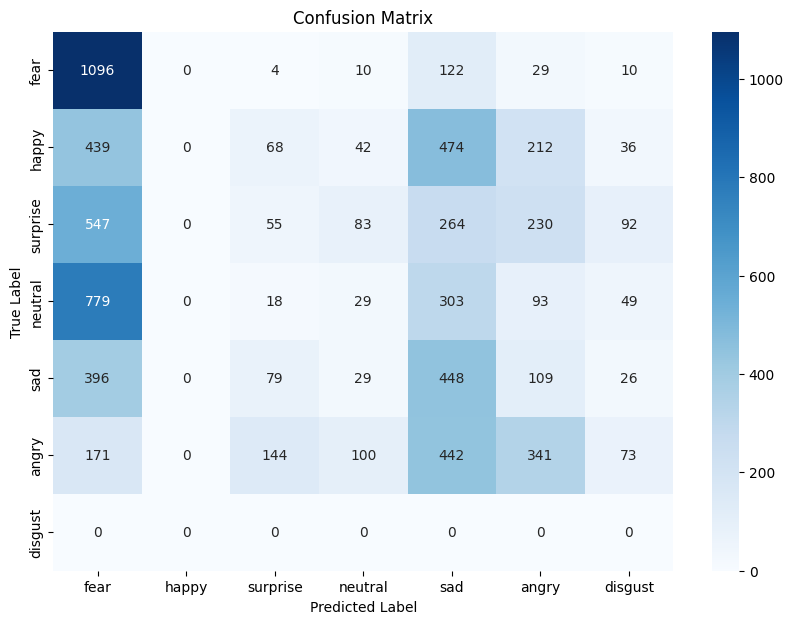

In [7]:
## CREMAD dataset
X_cremad = feats_crema.drop(columns=['dataset'])
y_cremad = crema['label']
evaluate_model(pipeline, X_cremad, y_cremad)

              precision    recall  f1-score   support

       angry       0.69      0.65      0.67       381
        fear       1.00      0.03      0.06        32
       happy       0.35      0.17      0.23       197
     neutral       0.55      0.66      0.60       518
         sad       0.62      0.74      0.67       375
    surprise       0.09      0.03      0.05        33

    accuracy                           0.59      1536
   macro avg       0.55      0.38      0.38      1536
weighted avg       0.57      0.59      0.56      1536

Accuracy: 0.5865885416666666


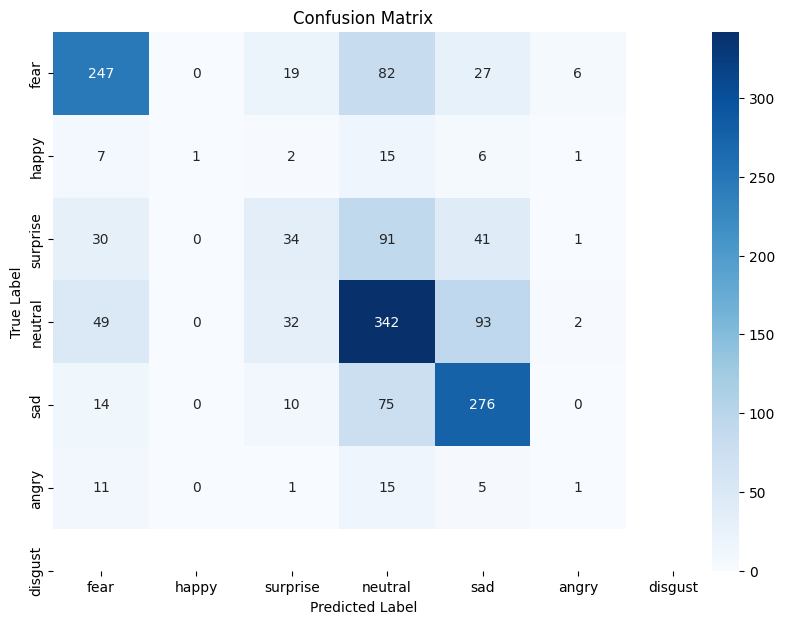

In [21]:
## IEMOCAP dataset
evaluate_model(pipeline, X_test, y_test)

In [9]:
best_model = pipeline

(10039, 62)
              precision    recall  f1-score   support

       angry       0.85      0.80      0.82      1269
     disgust       1.00      1.00      1.00         2
        fear       0.96      0.40      0.57       107
       happy       0.80      0.50      0.62       656
     neutral       0.73      0.82      0.77      1726
         sad       0.73      0.84      0.78      1250
    surprise       0.87      0.59      0.70       110

    accuracy                           0.77      5120
   macro avg       0.85      0.71      0.75      5120
weighted avg       0.78      0.77      0.76      5120

Accuracy: 0.766796875


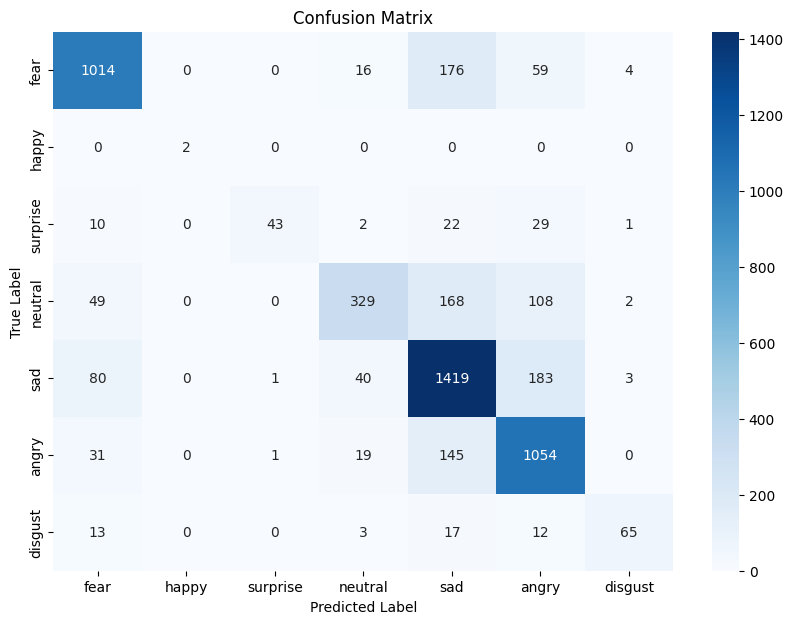

In [10]:
# Load features from disk
data = np.load('./features/iemocap_GeMAPS_features.npz')
print(data['X'].shape)  # Check available arrays in the file
X = data['X']
y = data['y']
# filter bothe to only include allowed emotions
allowed_emotions = ['happy', 'sad', 'angry', 'neutral', 'fear', 'surprise', 'disgust']
mask = np.isin(y, allowed_emotions)
X = X[mask]
y = y[mask]

evaluate_model(best_model, X, y)



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

pipeline.fit(X_train, y_train)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# perform grid search for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'svm__C': [0.1, 1.0, 10.0],
    'svm__gamma': ['scale', 'auto'],
    'svm__kernel': ['rbf', 'linear'], #['linear', 'rbf'],
    'feature_selection__k': [20, 30, 40] #[10, 20, 30]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Save the best model
best_model = grid_search.best_estimator_
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)
dump(best_model, 'ser_svm_model_iemocap.joblib')

/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


[7, 10, 40, 41, 55, 56, 57, 64, 67, 69, 77, 81, 131, 138, 143, 144, 148, 154, 157, 162, 168, 190, 213, 225, 229, 233, 245, 261, 262, 263, 266, 276, 280, 301, 314, 317, 330, 334, 342, 347, 350, 362, 363, 386, 393, 396, 404, 409, 417, 429, 443, 452, 465, 466, 475, 476, 487, 501, 513, 514, 515, 517, 519, 526, 528, 537, 539, 545, 548, 549, 551, 557, 559, 579, 582, 587, 605, 614, 630, 633, 655, 668, 688, 693, 699, 726, 741, 769, 774, 786, 810, 814, 815, 836, 846, 855, 872, 876, 889, 911, 912, 916, 921, 948, 960, 962, 966, 974, 977, 989, 996, 1006, 1007, 1012, 1017, 1018, 1021, 1033, 1035, 1041, 1050, 1063, 1065, 1076, 1118, 1119, 1121, 1131, 1143, 1145, 1162, 1165, 1166, 1168, 1182, 1189, 1195, 1207, 1209, 1222, 1232, 1238, 1241, 1242, 1254, 1264, 1272, 1280, 1302, 1336, 1346, 1353, 1357, 1359, 1360, 1390, 1392, 1397, 1409, 1421, 1431, 1444, 1448, 1468, 1474, 1489, 1502, 1534, 1540, 1554, 1563, 1568, 1570, 1591, 1599, 1610, 1628, 1631, 1633, 1640, 1663, 1665, 1673, 1685, 1687, 1698, 1703, 1

/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: Undefin

              precision    recall  f1-score   support

       angry       0.34      0.97      0.50       127
     disgust       0.00      0.00      0.00        46
        fear       0.00      0.00      0.00        69
       happy       0.03      0.01      0.02        71
     neutral       0.38      0.29      0.33        79
         sad       0.00      0.00      0.00        62

    accuracy                           0.32       454
   macro avg       0.12      0.21      0.14       454
weighted avg       0.17      0.32      0.20       454

Accuracy: 0.3237885462555066


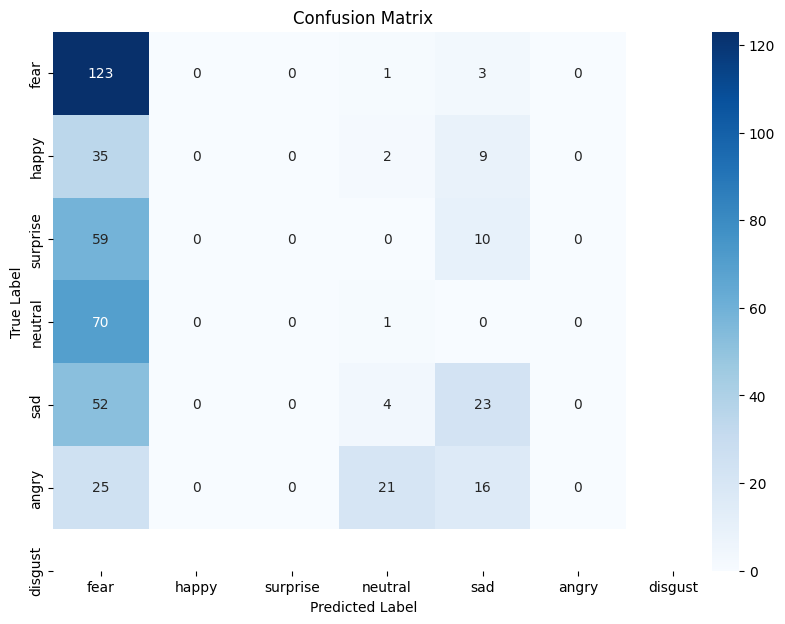

In [16]:
## EMO-DB dataset evaluation
emodb = df[df['dataset'] == 'emodb']
# collect idx of the EMO-DB dataset in the combined features dataframe
emodb_idx = [idx for idx in emodb.index]# if idx in y_test.index]
print(emodb_idx)
feats_emodb = feats_df.iloc[emodb_idx]
emodb_test = df.iloc[emodb_idx]
# Save the features to a csv file
feats_emodb.to_csv('emodb_test_features.csv', index=False)

X1 = feats_emodb
y1 = emodb_test['label']
# Split the dataset into training and testing sets
#X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42, stratify=y1)
# Make predictions
evaluate_model(best_model, X1, y1)

[0, 4, 14, 16, 18, 25, 29, 32, 44, 45, 48, 49, 54, 60, 62, 66, 73, 75, 82, 83, 85, 90, 93, 94, 95, 100, 108, 112, 113, 120, 124, 125, 130, 132, 136, 146, 151, 152, 158, 160, 161, 164, 172, 174, 175, 177, 178, 182, 183, 187, 188, 191, 193, 201, 205, 207, 210, 211, 212, 215, 217, 218, 219, 228, 239, 250, 251, 254, 259, 271, 272, 275, 282, 286, 288, 290, 292, 293, 300, 302, 304, 306, 307, 308, 309, 311, 319, 320, 321, 322, 323, 328, 333, 338, 340, 343, 344, 359, 361, 364, 367, 368, 369, 370, 375, 379, 383, 389, 391, 394, 397, 398, 400, 402, 405, 411, 413, 418, 419, 426, 428, 430, 431, 438, 442, 445, 446, 450, 453, 454, 455, 458, 460, 461, 470, 471, 473, 484, 486, 488, 490, 493, 500, 503, 507, 512, 516, 518, 520, 529, 530, 536, 540, 563, 564, 566, 567, 568, 570, 571, 572, 576, 581, 584, 586, 599, 602, 608, 612, 616, 617, 619, 620, 625, 628, 631, 632, 638, 639, 640, 641, 646, 647, 650, 657, 658, 660, 671, 675, 676, 678, 681, 682, 683, 684, 685, 686, 690, 697, 698, 706, 707, 711, 712, 714, 7

/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: Undefin

              precision    recall  f1-score   support

       angry       0.17      0.82      0.28       192
     disgust       0.00      0.00      0.00       192
        fear       0.00      0.00      0.00       192
       happy       1.00      0.01      0.02       192
     neutral       0.18      0.55      0.27        96
         sad       0.33      0.02      0.03       192
    surprise       0.00      0.00      0.00       192

    accuracy                           0.17      1248
   macro avg       0.24      0.20      0.09      1248
weighted avg       0.24      0.17      0.07      1248

Accuracy: 0.17307692307692307


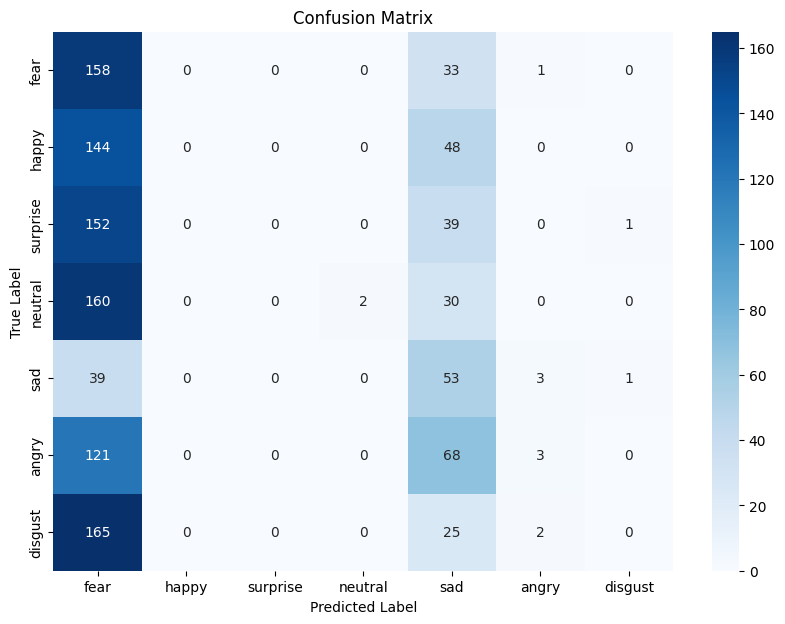

In [17]:
## RAVDESS dataset evaluation
ravdess = df[df['dataset'] == 'ravdess']
# collect idx of the RAVDESS dataset in the combined features dataframe
ravdess_idx = [idx for idx in ravdess.index]# if idx in y_test.index]
print(ravdess_idx)
feats_ravdess = feats_df.iloc[ravdess_idx]
ravdess_test = df.iloc[ravdess_idx]
# Save the features to a csv file
feats_ravdess.to_csv('ravdess_test_features.csv', index=False)  
X2 = feats_ravdess
y2 = ravdess_test['label']
# Make predictions
evaluate_model(best_model, X2, y2)

[1, 2, 3, 5, 6, 8, 9, 11, 12, 13, 15, 17, 19, 20, 21, 22, 23, 24, 26, 27, 28, 30, 31, 33, 34, 35, 36, 37, 38, 39, 42, 43, 46, 47, 50, 51, 52, 53, 58, 59, 61, 63, 65, 68, 70, 71, 72, 74, 76, 78, 79, 80, 84, 86, 87, 88, 89, 91, 92, 96, 97, 98, 99, 101, 102, 103, 104, 105, 106, 107, 109, 110, 111, 114, 115, 116, 117, 118, 119, 121, 122, 123, 126, 127, 128, 129, 133, 134, 135, 137, 139, 140, 141, 142, 145, 147, 149, 150, 153, 155, 156, 159, 163, 165, 166, 167, 169, 170, 171, 173, 176, 179, 180, 181, 184, 185, 186, 189, 192, 194, 195, 196, 197, 198, 199, 200, 202, 203, 204, 206, 208, 209, 214, 216, 220, 221, 222, 223, 224, 226, 227, 230, 231, 232, 234, 235, 236, 237, 238, 240, 241, 242, 243, 244, 246, 247, 248, 249, 252, 253, 255, 256, 257, 258, 260, 264, 265, 267, 268, 269, 270, 273, 274, 277, 278, 279, 281, 283, 284, 285, 287, 289, 291, 294, 295, 296, 297, 298, 299, 303, 305, 310, 312, 313, 315, 316, 318, 324, 325, 326, 327, 329, 331, 332, 335, 336, 337, 339, 341, 345, 346, 348, 349, 351,

/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: Undefin

              precision    recall  f1-score   support

       angry       0.22      0.70      0.34       400
     disgust       0.00      0.00      0.00       400
        fear       0.00      0.00      0.00       400
       happy       0.08      0.07      0.07       400
     neutral       0.21      0.62      0.31       400
         sad       0.00      0.00      0.00       400
    surprise       0.50      0.03      0.05       400

    accuracy                           0.20      2800
   macro avg       0.14      0.20      0.11      2800
weighted avg       0.14      0.20      0.11      2800

Accuracy: 0.2017857142857143


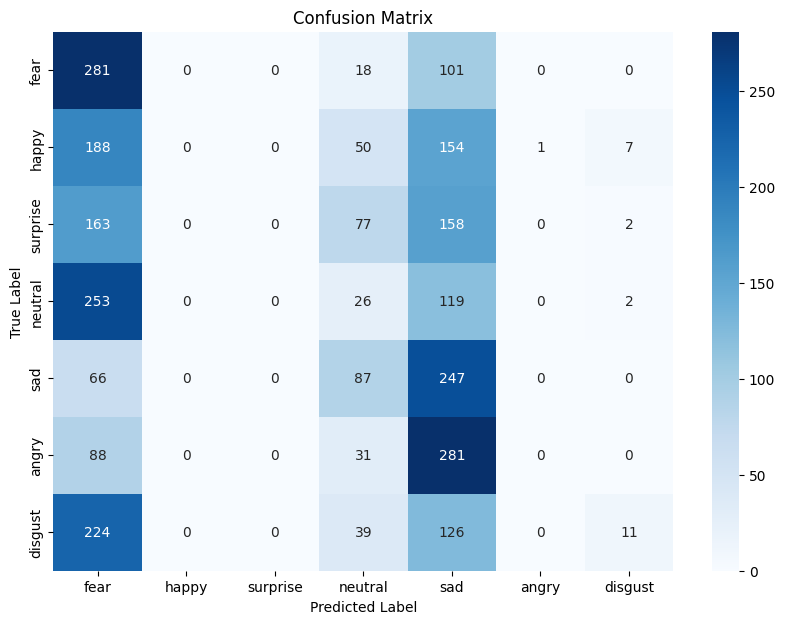

In [18]:
## TESS dataset evaluation
tess = df[df['dataset'] == 'tess']
# collect idx of the TESS dataset in the combined features dataframe
tess_idx = [idx for idx in tess.index]# if idx in y_test.index]
print(tess_idx)
feats_tess = feats_df.iloc[tess_idx]
tess_test = df.iloc[tess_idx]
# Save the features to a csv file
feats_tess.to_csv('tess_test_features.csv', index=False)
X3 = feats_tess
y3 = tess_test['label']
# Make predictions
evaluate_model(best_model, X3, y3)

### Experiment 1.2 – LSTM vs CNN 

Architecture: 

CNN: 1D Conv + GlobalMaxPooling 

LSTM: 1–2 stacked LSTM layers 

Input: Normalized MFCCs (fixed-length padded sequences) 

Metrics: F1-macro, Model size, Inference latency 

Write: We started to build a small CNN with only one layer of convolution, but it was too shallow to learn the characteristics extracted with openSMILE, so we started adding layers and reducing dropout until we started to get reasonable results.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, GlobalMaxPooling1D, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# CNN: 1D + GlobalMaxPooling1D
# Define the model
def create_cnn_model(input_shape, num_classes):
    
    model = Sequential()
    
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(Dropout(0.1))

    model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(Dropout(0.1))

    model.add(GlobalMaxPooling1D())
    
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.1))

    model.add(Dense(num_classes, activation='softmax'))

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0003)  # menor lr para mais estabilidade
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model
# Train on X_train, y_train
cnn_model = create_cnn_model((X_train.shape[1], 1), len(df['label'].unique()))
# add early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
# add a callback to save the best model
checkpoint = tf.keras.callbacks.ModelCheckpoint('ser_cnn_model.h5', monitor='val_loss', save_best_only=True, mode='min')
# add the checkpoint to the callbacks
callbacks = [early_stopping, checkpoint]
# learning rate scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 0.9 ** epoch, verbose=1)
callbacks.append(lr_scheduler)
# define learning rate as constant
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_reshaped = X_train_scaled.reshape(-1, X_train.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(-1, X_test.shape[1], 1)
# train the CNN model
cnn_model.fit(X_train_reshaped, y_train_encoded, epochs=1000, batch_size=16, validation_split=0.2, callbacks=callbacks)



Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/1000
158/158 [==============================] - 3s 10ms/step - loss: 2.0345 - accuracy: 0.2996 - val_loss: 1.8522 - val_accuracy: 0.4184 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0009000000000000001.
Epoch 2/1000
 22/158 [===>..........................] - ETA: 1s - loss: 1.6648 - accuracy: 0.3636

/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


158/158 [==============================] - 1s 9ms/step - loss: 1.5738 - accuracy: 0.4123 - val_loss: 1.6357 - val_accuracy: 0.5151 - lr: 9.0000e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.0008100000000000001.
Epoch 3/1000
158/158 [==============================] - 1s 8ms/step - loss: 1.4608 - accuracy: 0.4611 - val_loss: 1.4266 - val_accuracy: 0.5753 - lr: 8.1000e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.0007290000000000002.
Epoch 4/1000
158/158 [==============================] - 1s 8ms/step - loss: 1.3619 - accuracy: 0.5040 - val_loss: 1.3227 - val_accuracy: 0.5594 - lr: 7.2900e-04

Epoch 5: LearningRateScheduler setting learning rate to 0.0006561000000000001.
Epoch 5/1000
158/158 [==============================] - 1s 9ms/step - loss: 1.2925 - accuracy: 0.5397 - val_loss: 1.1993 - val_accuracy: 0.5848 - lr: 6.5610e-04

Epoch 6: LearningRateScheduler setting learning rate to 0.00059049.
Epoch 6/1000
158/158 [==============================] - 1s 8

In [ ]:
# Evaluate the CNN model
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_reshaped, y_test_encoded)
print(f"CNN Test Loss: {cnn_loss}, Test Accuracy: {cnn_accuracy}")
# Save the CNN model
cnn_model.save('ser_cnn_model.h5')
# Save end to end model (with feature extraction, scaler, and CNN)
import joblib
end_to_end_model = {
    'feature_extractor': smile,
    'scaler': scaler,
    'cnn_model': cnn_model,
    'label_encoder': le
}
joblib.dump(end_to_end_model, 'ser_end_to_end_model.joblib')


43/43 [==============================] - 0s 3ms/step - loss: 0.7838 - accuracy: 0.7269
CNN Test Loss: 0.7838073372840881, Test Accuracy: 0.7268689870834351


['ser_end_to_end_model.joblib']

In [74]:

X1_test_scaled = scaler.transform(X1)
X1_test_reshaped = X1_test_scaled.reshape(-1, X1.shape[1], 1)
y1 = le.transform(y1)  # Encode labels for EMO-DB
X2_test_scaled = scaler.transform(X2)
X2_test_reshaped = X2_test_scaled.reshape(-1, X2.shape[1], 1)
y2 = le.transform(y2)  # Encode labels for RAVDESS
X3_test_scaled = scaler.transform(X3)
X3_test_reshaped = X3_test_scaled.reshape(-1, X3.shape[1], 1)
y3 = le.transform(y3)  # Encode labels for TESS

ValueError: y contains previously unseen labels: 3

In [73]:

# Evaluate the CNN model on EMO-DB dataset
cnn_emodb_loss, cnn_emodb_accuracy = cnn_model.evaluate(feats_emodb.values.reshape(feats_emodb.shape[0], feats_emodb.shape[1], 1), y1)
print(f"CNN EMO-DB Test Loss: {cnn_emodb_loss}, Test Accuracy: {cnn_emodb_accuracy}")
# Evaluate the CNN model on RAVDESS dataset
cnn_ravdess_loss, cnn_ravdess_accuracy = cnn_model.evaluate(feats_ravdess.values.reshape(feats_ravdess.shape[0], feats_ravdess.shape[1], 1), y2)
print(f"CNN RAVDESS Test Loss: {cnn_ravdess_loss}, Test Accuracy: {cnn_ravdess_accuracy}")
# Evaluate the CNN model on TESS dataset
cnn_tess_loss, cnn_tess_accuracy = cnn_model.evaluate(feats_tess.values.reshape(feats_tess.shape[0], feats_tess.shape[1], 1), y3)
print(f"CNN TESS Test Loss: {cnn_tess_loss}, Test Accuracy: {cnn_tess_accuracy}")

5/5 [==============================] - 0s 3ms/step - loss: 141.8723 - accuracy: 0.1259
CNN EMO-DB Test Loss: 141.87234497070312, Test Accuracy: 0.1259259283542633
11/11 [==============================] - 0s 3ms/step - loss: 135.6223 - accuracy: 0.1580
CNN RAVDESS Test Loss: 135.62225341796875, Test Accuracy: 0.15804597735404968
28/28 [==============================] - 0s 3ms/step - loss: 159.7747 - accuracy: 0.1118
CNN TESS Test Loss: 159.77474975585938, Test Accuracy: 0.11175115406513214


CNN + LSTM

- Short-term GeMAPS (LLDs only)
- Fixed-length padding/truncation
- CNN input-ready formatting
- Feature scaling (per-feature)

In [75]:
from tensorflow.keras.layers import LSTM, TimeDistributed, BatchNormalization

def create_cnn_lstm_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))

    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer=tf.keras.optimizers.Adam(0.0003), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Train on X_train, y_train
cnn_model = create_cnn_lstm_model((X_train.shape[1], 1), len(df['label'].unique()))
# add early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
# add a callback to save the best model
checkpoint = tf.keras.callbacks.ModelCheckpoint('ser_cnn_model.h5', monitor='val_loss', save_best_only=True, mode='min')
# add the checkpoint to the callbacks
callbacks = [early_stopping, checkpoint]
# learning rate scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 0.9 ** epoch, verbose=1)
callbacks.append(lr_scheduler)
# define learning rate as constant
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_reshaped = X_train_scaled.reshape(-1, X_train.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(-1, X_test.shape[1], 1)
# train the CNN model
cnn_model.fit(X_train_reshaped, y_train_encoded, epochs=1000, batch_size=16, validation_split=0.2, callbacks=callbacks)


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/1000
158/158 [==============================] - 9s 31ms/step - loss: 1.7635 - accuracy: 0.2948 - val_loss: 2.0425 - val_accuracy: 0.1854 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0009000000000000001.
Epoch 2/1000
  5/158 [..............................] - ETA: 4s - loss: 1.5971 - accuracy: 0.3250

/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


158/158 [==============================] - 4s 27ms/step - loss: 1.5096 - accuracy: 0.4119 - val_loss: 1.7963 - val_accuracy: 0.2552 - lr: 9.0000e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.0008100000000000001.
Epoch 3/1000
158/158 [==============================] - 4s 26ms/step - loss: 1.3791 - accuracy: 0.4639 - val_loss: 1.3433 - val_accuracy: 0.4548 - lr: 8.1000e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.0007290000000000002.
Epoch 4/1000
158/158 [==============================] - 4s 27ms/step - loss: 1.3078 - accuracy: 0.4968 - val_loss: 1.2201 - val_accuracy: 0.5388 - lr: 7.2900e-04

Epoch 5: LearningRateScheduler setting learning rate to 0.0006561000000000001.
Epoch 5/1000
158/158 [==============================] - 4s 27ms/step - loss: 1.2770 - accuracy: 0.5143 - val_loss: 1.1496 - val_accuracy: 0.5468 - lr: 6.5610e-04

Epoch 6: LearningRateScheduler setting learning rate to 0.00059049.
Epoch 6/1000
158/158 [==============================] - 

In [81]:
import numpy as np

def pad_or_truncate(features, max_frames=200):
    num_frames, num_features = features.shape
    if num_frames >= max_frames:
        return features[:max_frames, :]
    else:
        padding = np.zeros((max_frames - num_frames, num_features))
        return np.vstack((features, padding))


from sklearn.preprocessing import StandardScaler

def standardize_features(X):
    num_samples, num_frames, num_features = X.shape
    X_reshaped = X.reshape(-1, num_features)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_reshaped)
    return X_scaled.reshape(num_samples, num_frames, num_features), scaler


from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, Dropout, GlobalMaxPooling1D, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

def create_cnn_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv1D(64, 3, activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Conv1D(128, 3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(GlobalMaxPooling1D())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer=tf.keras.optimizers.Adam(0.0003),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


callbacks = [
    EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True),
    ModelCheckpoint('cnn_gemaps_model.h5', monitor='val_loss', save_best_only=True)
]
max_frames = 2000
num_features = feats_df.shape[1]
#X_train_padded = np.array([pad_or_truncate(feats) for feats in feats_df.values])
X_train_scaled = scaler.transform(X_train)
X_train_reshaped = X_train_scaled.reshape(-1, max_frames, num_features)
cnn_model = create_cnn_model(input_shape=(max_frames, num_features), num_classes=len(np.unique(y_encoded)))
cnn_model.fit(X_train, y_train_encoded, epochs=200, batch_size=16,
              validation_split=0.2, callbacks=callbacks)

# Evaluate the CNN model
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test, y_test_encoded)
print(f"CNN Test Loss: {cnn_loss}, Test Accuracy: {cnn_accuracy}")

ValueError: cannot reshape array of size 195362 into shape (2000,62)

### Experiment 1.3 – Apply SOTA or hybrid 

Reference Methods: Implement or replicate: 

[Zhao et al., 2019] CNN+Attention 

[Neumann & Vu, 2020] BiLSTM + Attention 

Compare to baseline: SVM + GeMAPS 

Dataset Augmentation: Try data balancing (SMOTE or oversampling) 